In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/kgpark88/ai-summary/main/churn_data.csv')

### 데이터 전처리 

In [2]:
df.drop('customerID', axis=1, inplace=True)

In [3]:
df['TotalCharges'].replace([' '], ['0'], inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [4]:
df['Churn'].replace(['Yes', 'No'], [1, 0], inplace=True)

### 더미 특성 생성

In [5]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod']

In [6]:
dummies = pd.get_dummies(df[cols], drop_first=True)

In [7]:
df = df.drop(cols, axis=1)

In [8]:
df = pd.concat([df, dummies], axis=1)

### 입력(X)과 레이블(y) 선택

In [9]:
X = df.drop('Churn', axis=1).values

In [10]:
y = df['Churn'].values

In [11]:
X.shape

(7043, 30)

<Axes: >

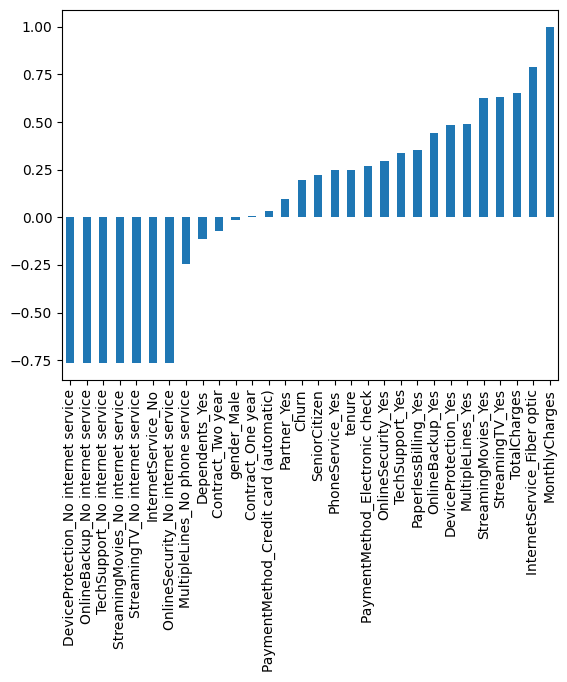

In [12]:
df.corr()['MonthlyCharges'][:-1].sort_values().plot(kind='bar')

### seaborn 설치

In [13]:
# !pip install seaborn

In [ ]:
### 상관관계 분석

In [14]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

### 카운드 플롯

<Axes: xlabel='Churn', ylabel='count'>

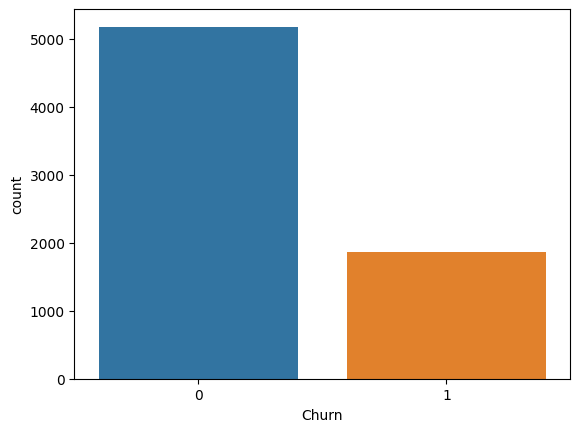

In [15]:
sns.countplot(x='Churn',data=df)

### 박스 플롯

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

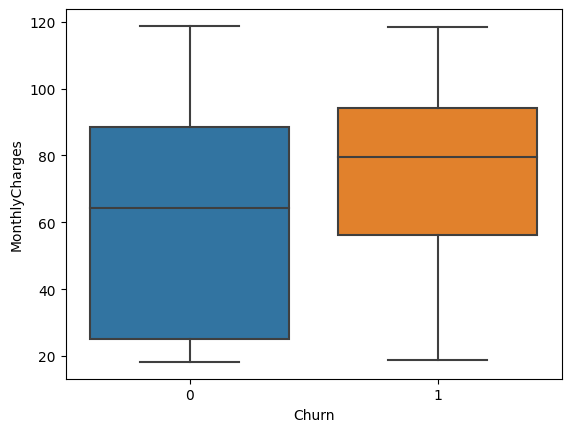

In [16]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

### Train, Test  데이터셋 분할

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,random_state=42)

In [20]:
X_train.shape

(4930, 30)

In [21]:
y_train.shape

(4930,)

### 데이터 정규화/스케일링(Normalizing/Scaling)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 딥러닝 모델

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [24]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(30,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#### 모델 컴파일 – 이진 분류 모델

In [25]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

- 모델 컴파일 – 다중 분류 모델  
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 


- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse')

### 모델 훈련(학습) - 조기종료

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', mode='min', 
                           verbose=1, patience=5)
check_point = ModelCheckpoint('best_model.h5', verbose=1,
                              monitor='val_loss', mode='min', 
                              save_best_only=True)
history = model.fit(x=X_train, y=y_train, 
          epochs=50 , batch_size=20,
          validation_data=(X_test, y_test), 
          verbose=0,
          callbacks=[early_stop, check_point])


Epoch 1: val_loss improved from inf to 0.43602, saving model to best_model.h5

Epoch 2: val_loss did not improve from 0.43602

Epoch 3: val_loss did not improve from 0.43602

Epoch 4: val_loss did not improve from 0.43602

Epoch 5: val_loss did not improve from 0.43602

Epoch 6: val_loss did not improve from 0.43602
Epoch 6: early stopping


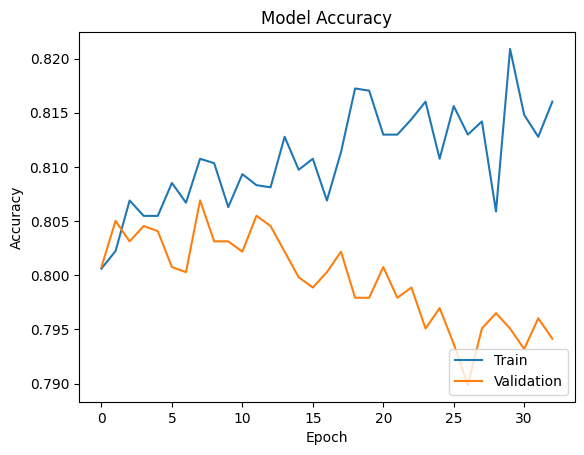

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [34]:
predictions

array([[0.65413976],
       [0.2117927 ],
       [0.00438811],
       ...,
       [0.01125146],
       [0.33342573],
       [0.26251388]], dtype=float32)